## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

- Facilitate the process of visa approvals.
- Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description:

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

- case_id: ID of each visa application
- continent: Information of continent the employee
- education_of_employee: Information of education of the employee
- has_job_experience: Does the employee has any job experience? Y= Yes; N = No
- requires_job_training: Does the employee require any job training? Y = Yes; N = No
- no_of_employees: Number of employees in the employer's company
- yr_of_estab: Year in which the employer's company was established
- region_of_employment: Information of foreign worker's intended region of employment in the US.
- prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
- unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
- full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
- case_status: Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, fbeta_score, make_scorer, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

from xgboost import XGBClassifier

## Reading the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Loading dataset
original=pd.read_csv("/content/drive/MyDrive/DS&BA @ UTA/Module 5/DataSets/EasyVisa.csv")

In [ ]:
# Creating copy
data = original.copy()

## Overview of the dataset

### First and last 5 rows of the dataset

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57000,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79000,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85000,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77000,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91000,Year,Y,Certified


- The data was loaded properly

In [ ]:
data.shape

(25480, 12)

- There are 25,480 rows and 12 columns

### Data types and non-null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- There are 9 object values and 3 numeric.

In [ ]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There are no missing values in the dataset

In [ ]:
data.duplicated().sum()

0

- There are no duplicated values in the dataset


### Summary of dataset

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.00000,NaN,NaN,NaN,5667.04321,22877.92885,-26.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,NaN,NaN,NaN,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.00000,NaN,NaN,NaN,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 66% of employees come from Asia.
- 40% of employees have up to a Bachelor's Degree (most recurring degree)
- 58% of employees have job experience
- Most  employees don't require training (88%)
- There are outliers for the number of employees in employer's companies due to a significant difference between the 4th quartile and max value. There are also negative values that need to be taken care of.
- There are companies established from 1800 all the way to 2016.
- 28% of employees are being employed in the Northeast region (most recurring value)
- The average prevailing wage is 74,455, with 75% of employees being offered less than 107,735.
- Most  employees are offered a full-time position (89%)
- 66% of foreign workers are given a Visa.


In [ ]:
data.loc[data['no_of_employees']<0].shape

(33, 12)

- There are 33 companies with negative numbers. We will change them to postive, as it could've been a typing error.

In [ ]:
data["no_of_employees"] = abs(data["no_of_employees"])
# 'abs' function will convert any number into their absolute number

In [ ]:
data.loc[data['no_of_employees']<0].shape

(0, 12)

### Number of unique values in each column

In [ ]:
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

- We can drop case_id because it won't add any value to our model.

In [ ]:
# Dropping column from the dataframe
data.drop(['case_id'], axis=1, inplace=True)

In [ ]:
# Changing object columns into categorical
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with categories
data.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.14000,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.39000,Year,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,418.22980,Hour,Y,Denied
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19000,Year,Y,Certified
9,Europe,Doctorate,Y,N,2251,1995,South,67514.76000,Year,Y,Certified


### Number of observations in each category

In [ ]:
# Observations in each category
cat_cols=list(data.select_dtypes("category").columns)
for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
------------------------------
Y    22773
N     2707
Name: full_time_position, dtype: int64
------------------------------
Certified    17018
Denied        8462
Name: case_status, dtype: int64
---------

##Exploratory Data Analysis (EDA) Summary</a>

###Functions for Univariate EDA

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

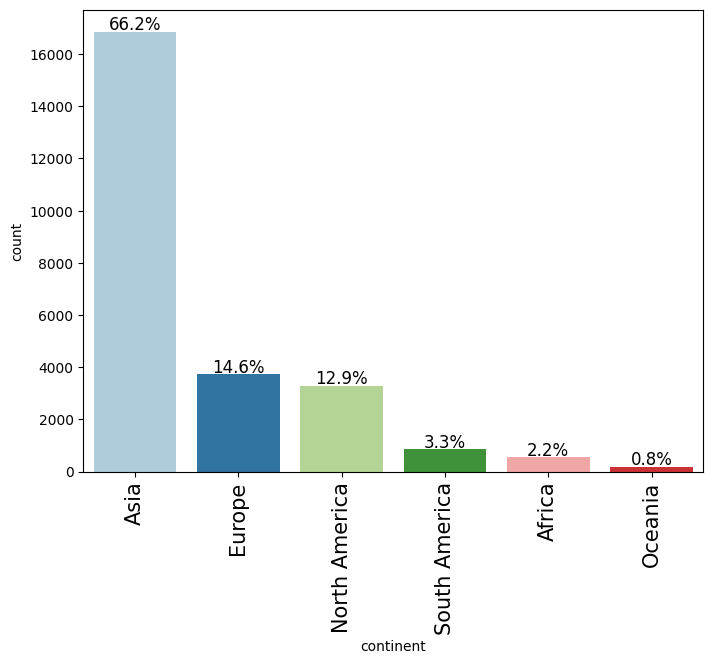

In [ ]:
labeled_barplot(data, "continent", perc=True) 

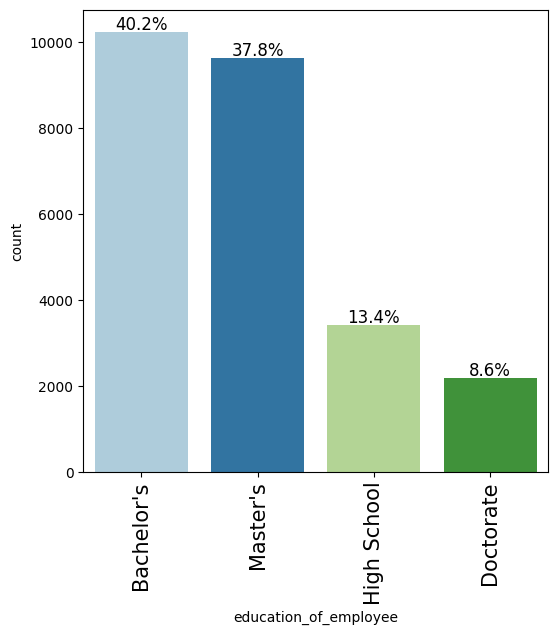

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True) 

- Only 8.6% of employees have a Doctorate Degree, and surprisingly 13.4% only have a High School Diploma.

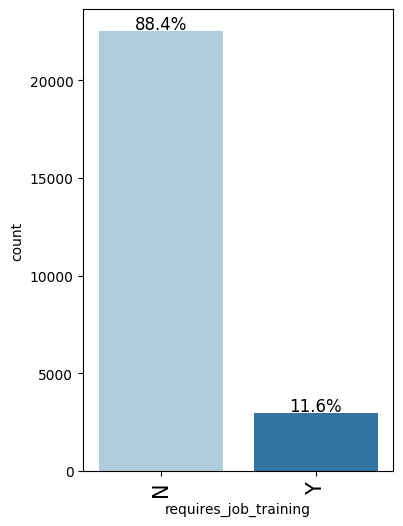

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True) 

- Only 11.6% of employees require training.

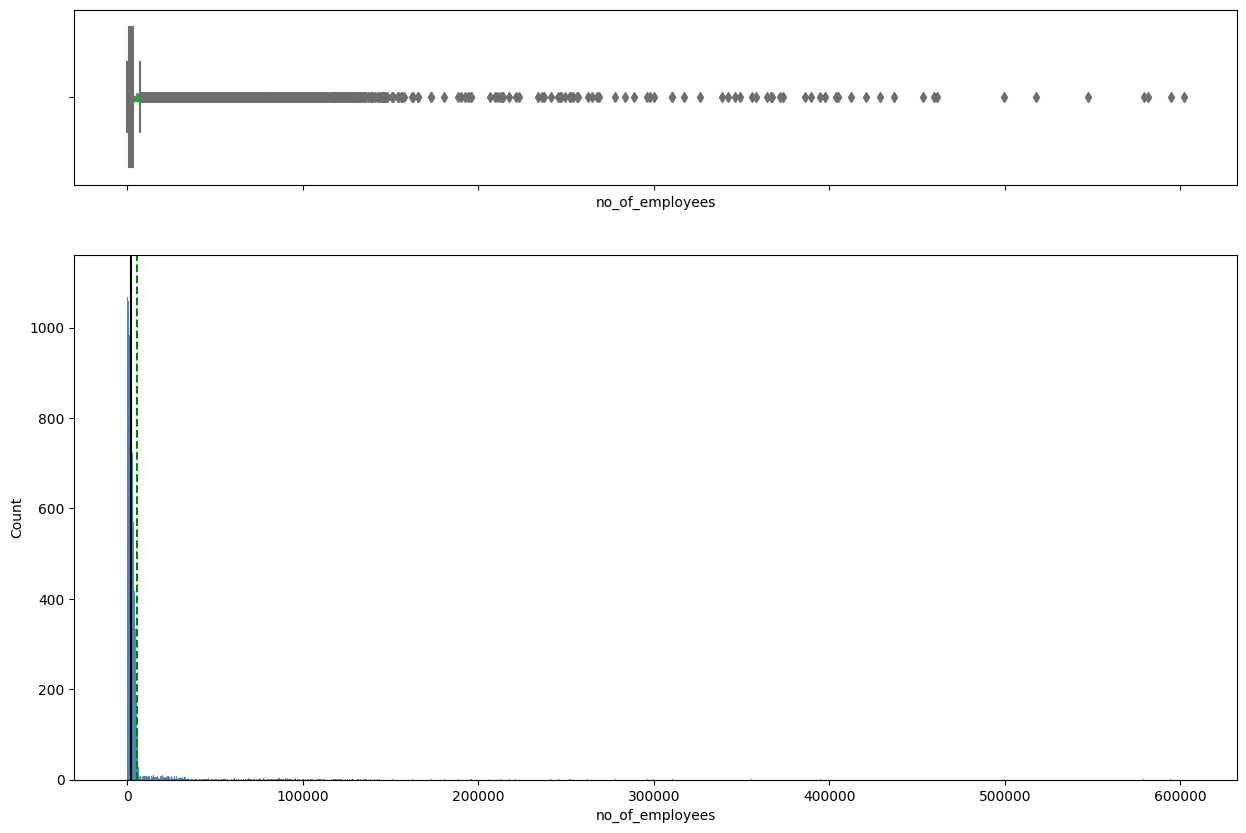

In [ ]:
histogram_boxplot(data, "no_of_employees")

In [ ]:
#Top 5 highest values 
data['no_of_employees'].nlargest()

21339    602069
1345     594472
20345    581468
11317    579004
9587     547172
Name: no_of_employees, dtype: int64

In [ ]:
#Top 5 smallest values 
data['no_of_employees'].nsmallest()

378      11
7761     11
14022    11
14726    11
15859    11
Name: no_of_employees, dtype: int64

- The distribution is right-skewed with a lot of outliers.
- Most companies have less than 12,500 employees.
- The max number of employees is 602,069, while the smallest companies have 11.

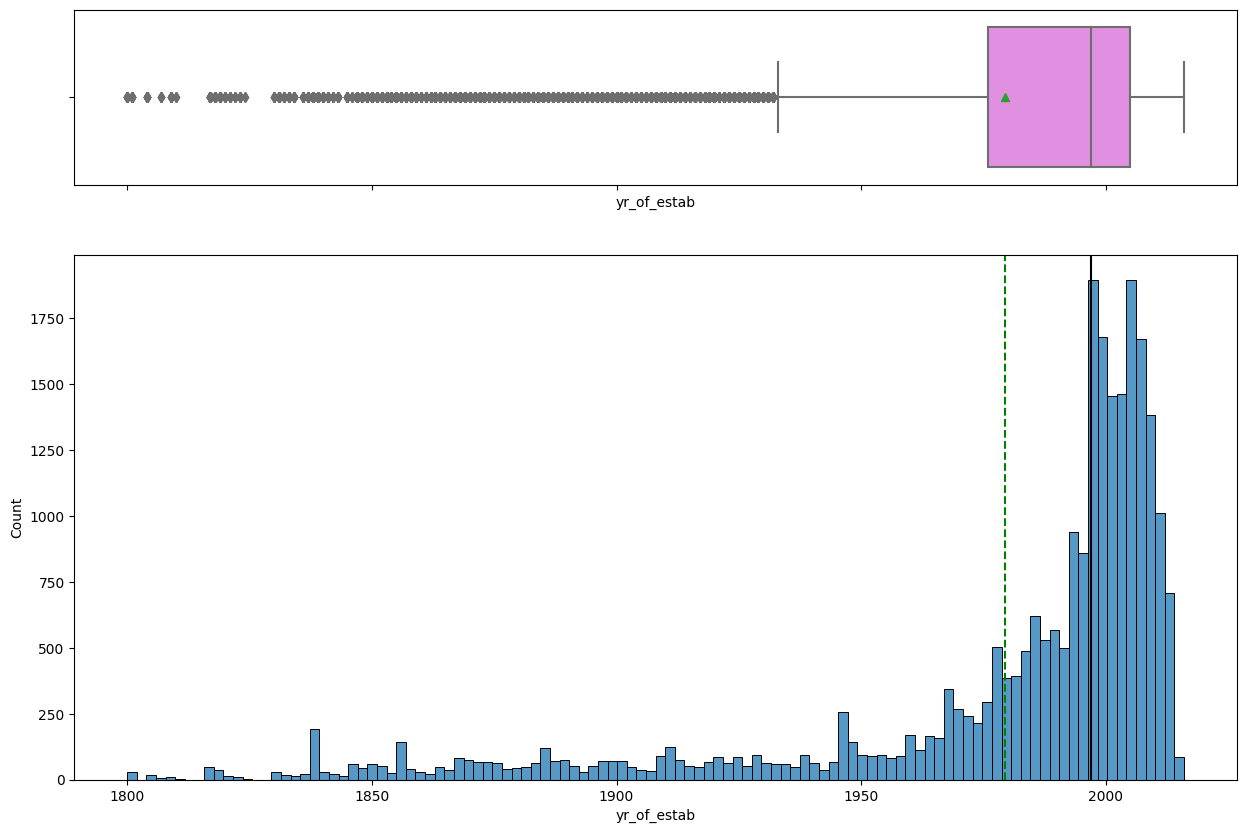

In [ ]:
histogram_boxplot(data, "yr_of_estab")


- The distribution is left-skewed, with many outliers to the left.
- 75% of companies were founded after around 1980.
- There are some companies that go all the way back to the 1800s



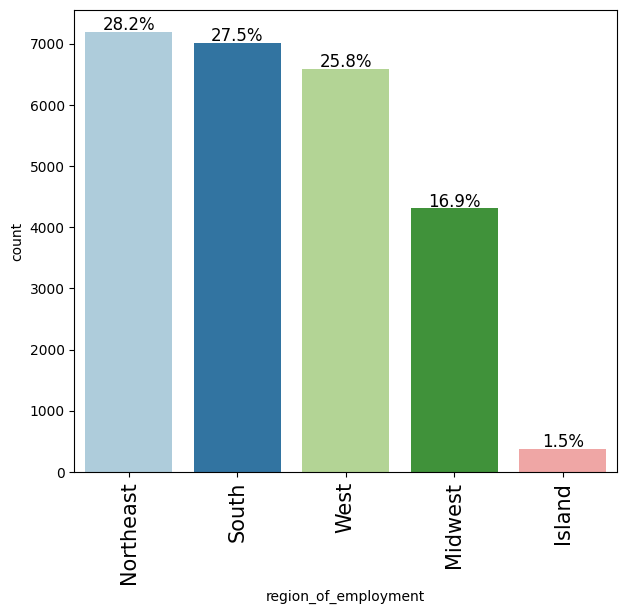

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True) 

- Island regions only contribute to 1.5% of employment.

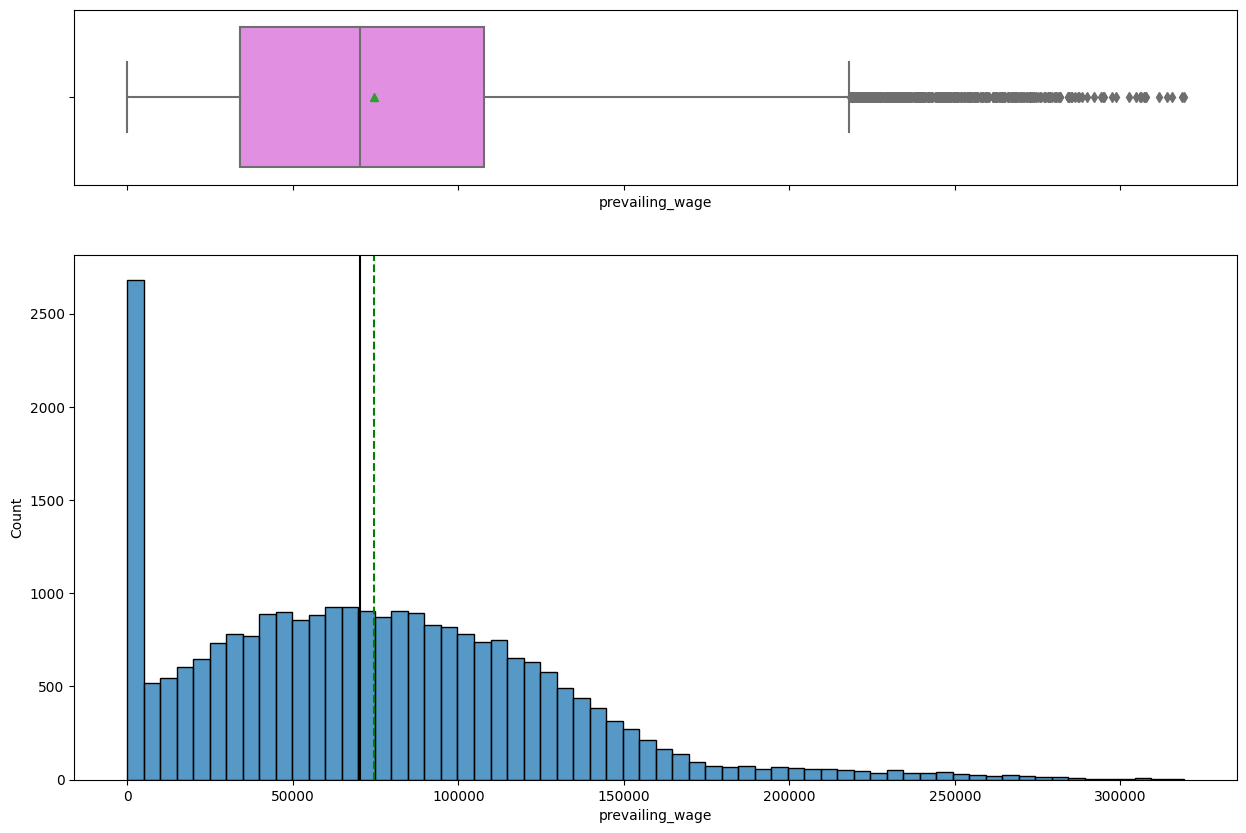

In [ ]:
histogram_boxplot(data, "prevailing_wage")

- The distribution is right-skewed with a lot of outliers to the right.
- There are a lot of employees being offered really low pay. Could possibly be for hourly wages.

In [ ]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts

<bound method IndexOpsMixin.value_counts of 338      Hour
634      Hour
839      Hour
876      Hour
995      Hour
1144     Hour
1147     Hour
1215     Hour
1238     Hour
1326     Hour
1333     Hour
1346     Hour
1409     Hour
1872     Hour
1880     Hour
2010     Hour
2335     Hour
2384     Hour
2492     Hour
2628     Hour
2688     Hour
2700     Hour
2860     Hour
3035     Hour
3459     Hour
3491     Hour
3665     Hour
3878     Hour
3938     Hour
4255     Hour
4536     Hour
4812     Hour
5090     Hour
5377     Hour
5384     Hour
5455     Hour
5545     Hour
5546     Hour
5562     Hour
6006     Hour
6220     Hour
6770     Hour
7007     Hour
7066     Hour
7084     Hour
7127     Hour
7145     Hour
7352     Hour
7410     Hour
7530     Hour
7644     Hour
7824     Hour
7925     Hour
8007     Hour
8233     Hour
8244     Hour
8412     Hour
8488     Hour
8624     Hour
8769     Hour
8881     Hour
8914     Hour
9281     Hour
9363     Hour
9536     Hour
9808     Hour
9813     Hour
9899     Hour
1000

- We don't have to worry about low values, as they stand for hourly wages.

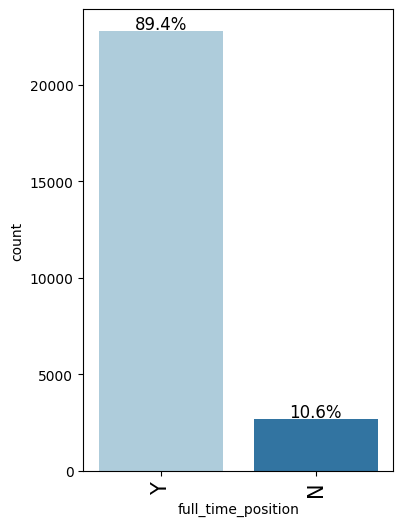

In [ ]:
labeled_barplot(data, "full_time_position", perc=True) 

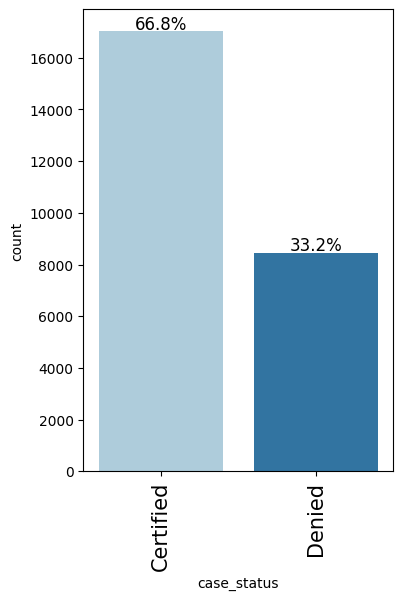

In [ ]:
labeled_barplot(data, "case_status", perc=True) 

###Functions for Bivariate EDA

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))

    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    
    plt.tight_layout()
    plt.show()

### Bivariate analysis

**Correlation Check**

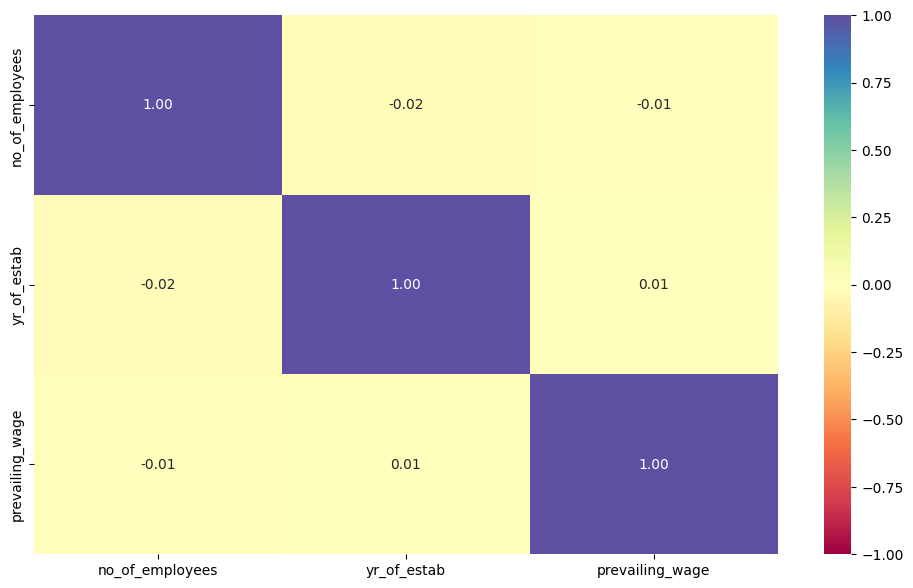

In [ ]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There are no correlations between the numeric variables.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


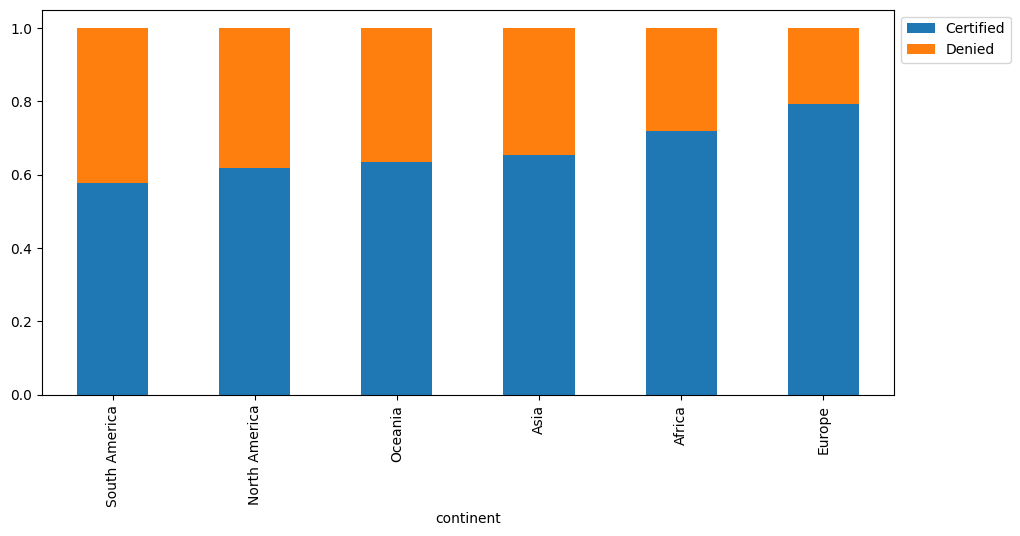

In [ ]:
 stacked_barplot(data, "continent", "case_status")

- Europian employees are more likely to land a job, with almost 80% of VISAS being approved.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


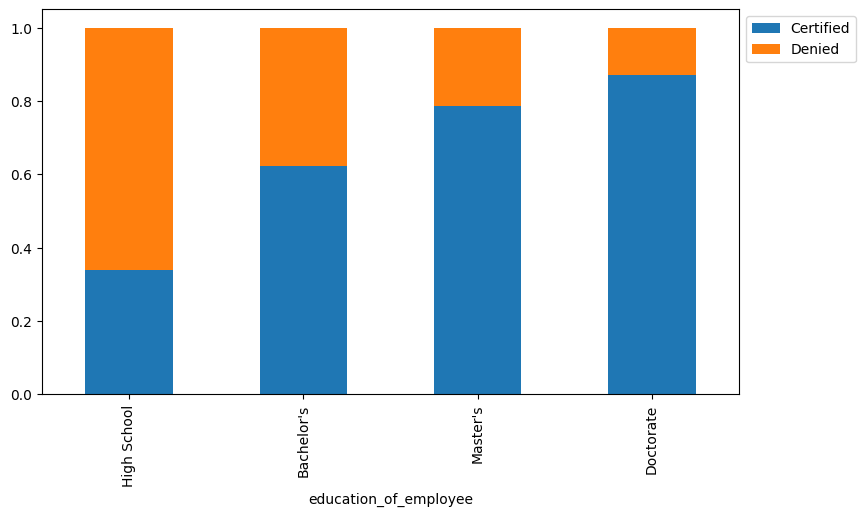

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

- The higher the education, the more chances of getting certified. 
- Only around 35% of applicants with High School diplomas get a VISA.

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192
------------------------------------------------------------------------------------------------------------------------


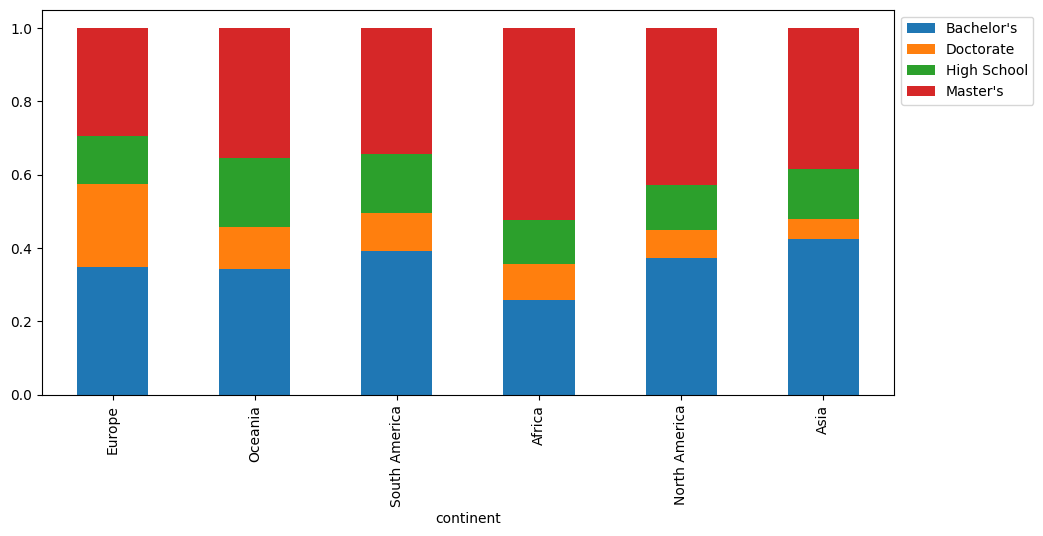

In [ ]:
stacked_barplot(data, "continent", "education_of_employee")


- Around 26% of european employees have a Doctorate's Degree, which explains the high approval rate for VISAs.

 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


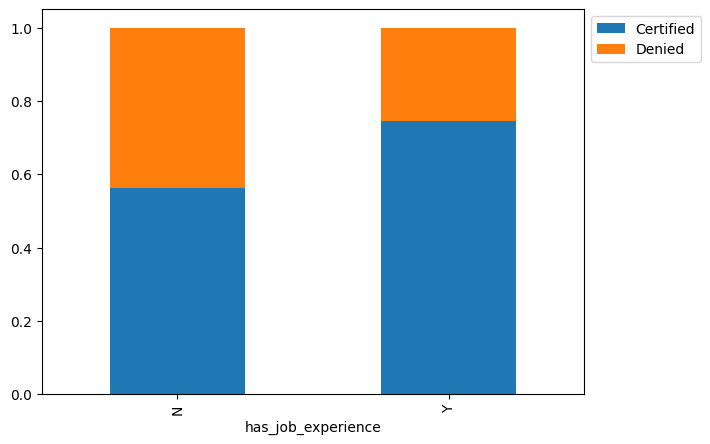

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

- Those with job experience have 20% more chance of getting certified.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


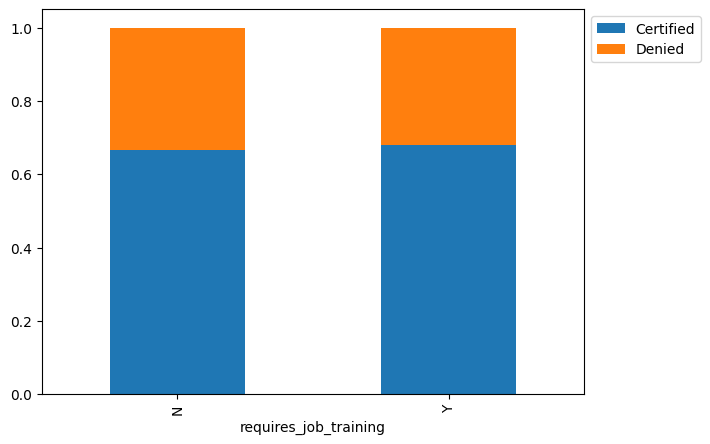

In [ ]:
stacked_barplot(data, "requires_job_training", "case_status")

- Training requirement doesn't affect certification.

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


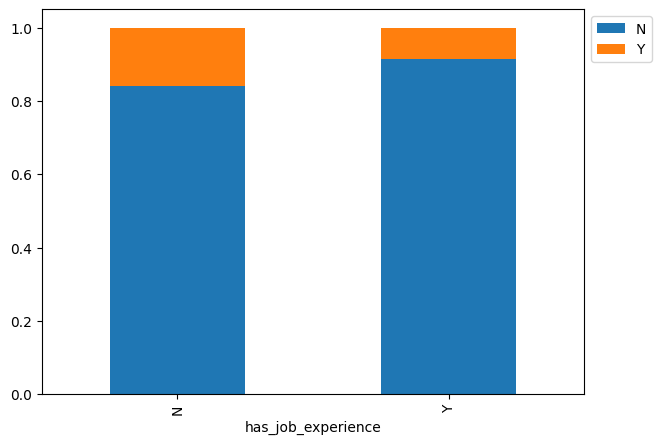

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

- Those with job experience have a around a 10% less chance of requiring training.

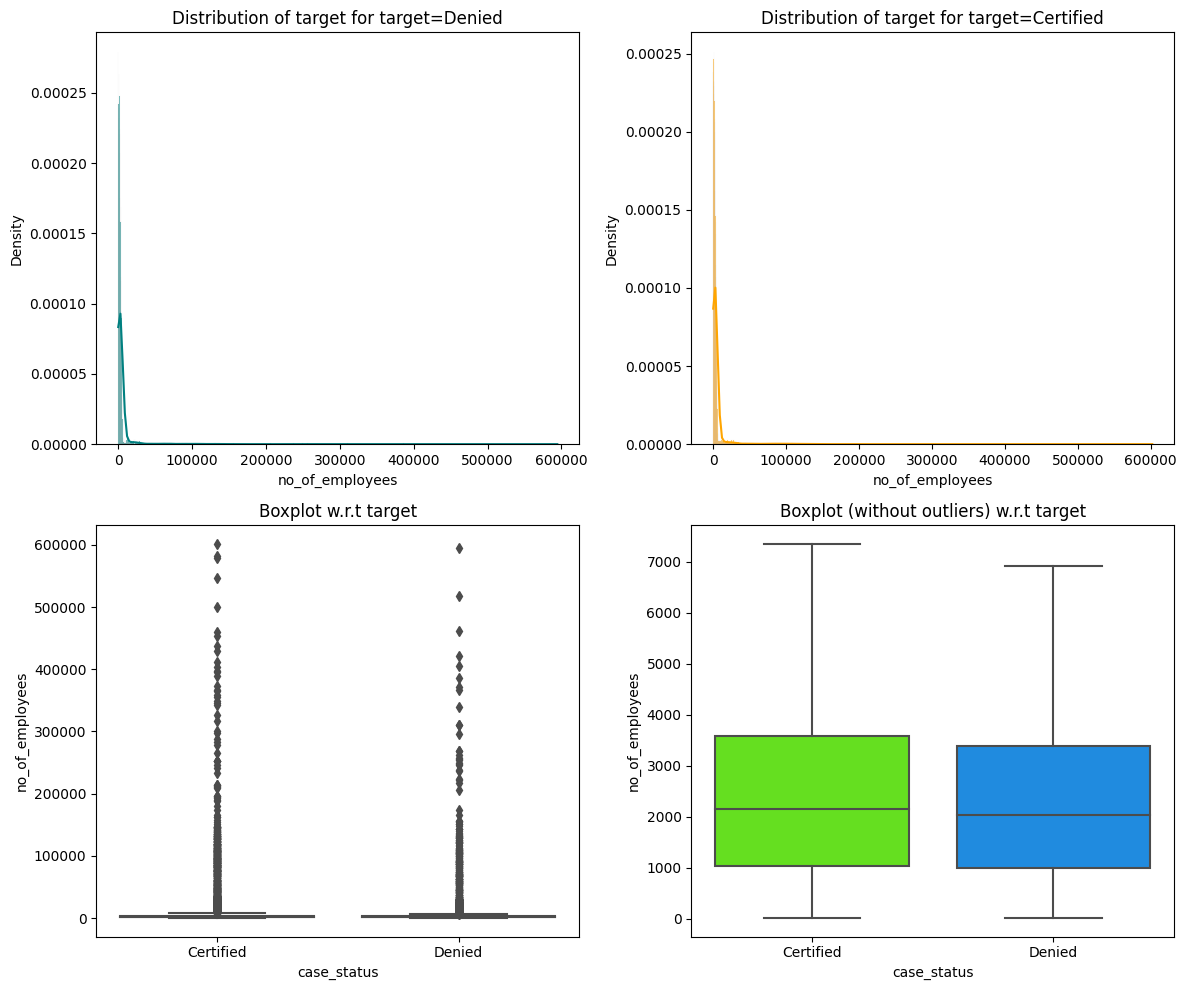

In [ ]:
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

- There's a tiny bit more chance of getting certified for larger companies.

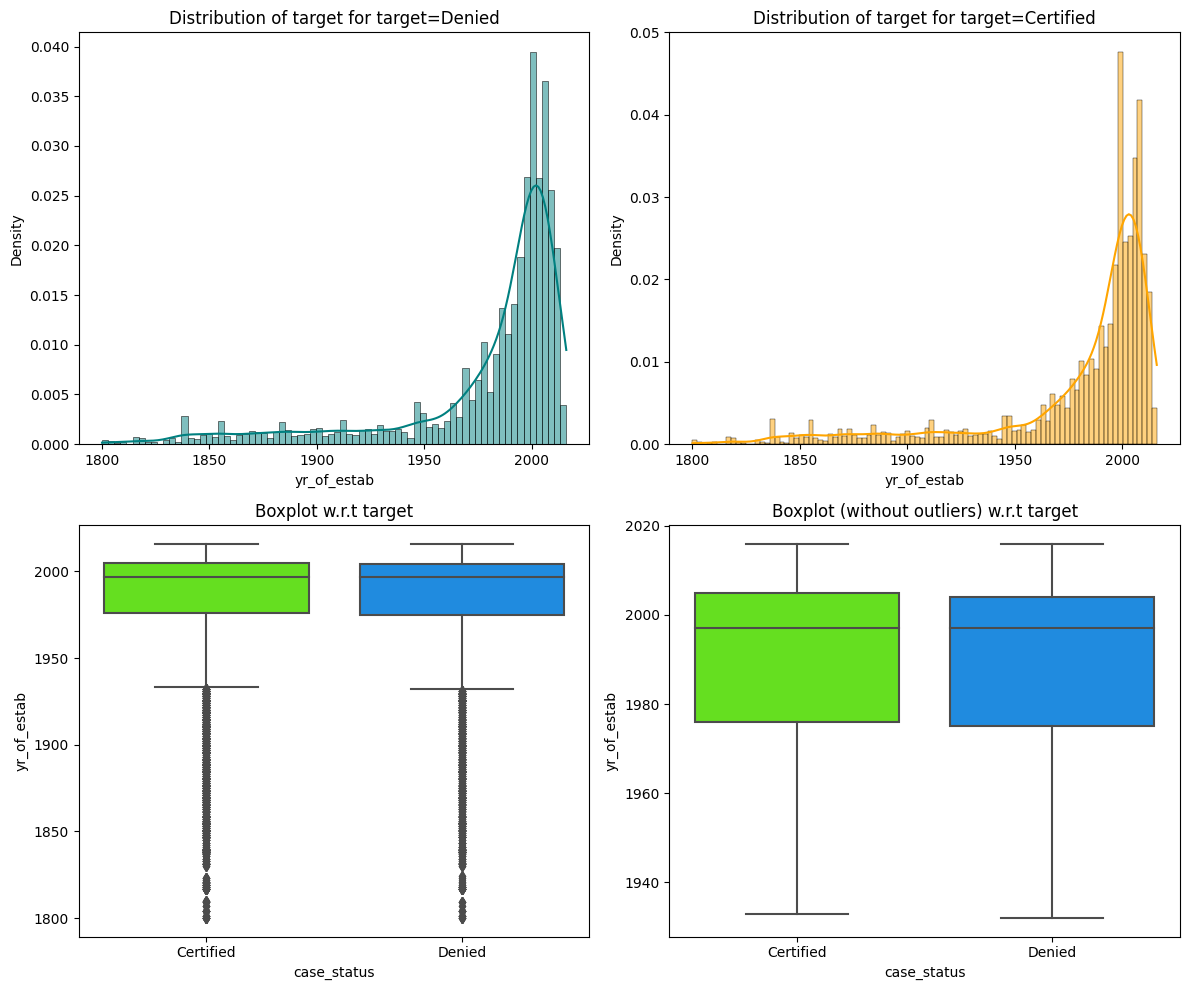

In [ ]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

- There's no impact of the year of establisment of a company related to certification outcome.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


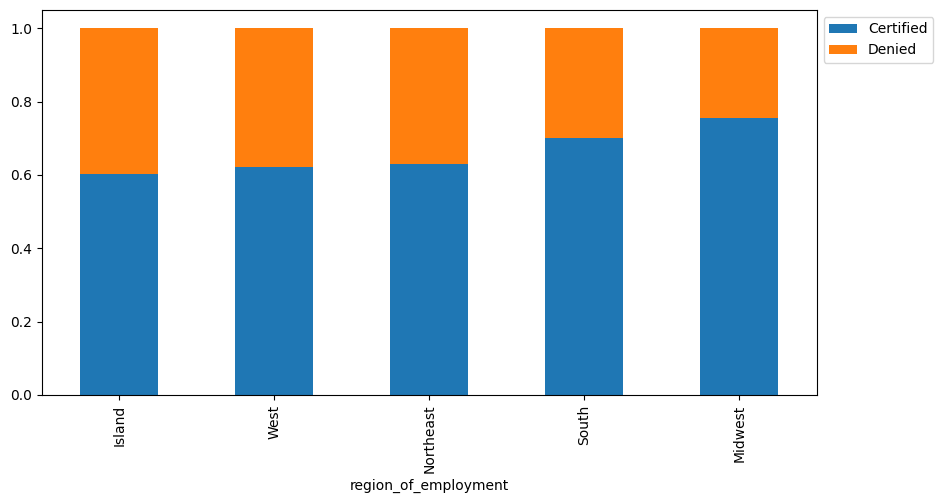

In [ ]:
stacked_barplot(data, "region_of_employment", "case_status")

- Midwest regions applications tend to get certified more often, followed by Southern regions.

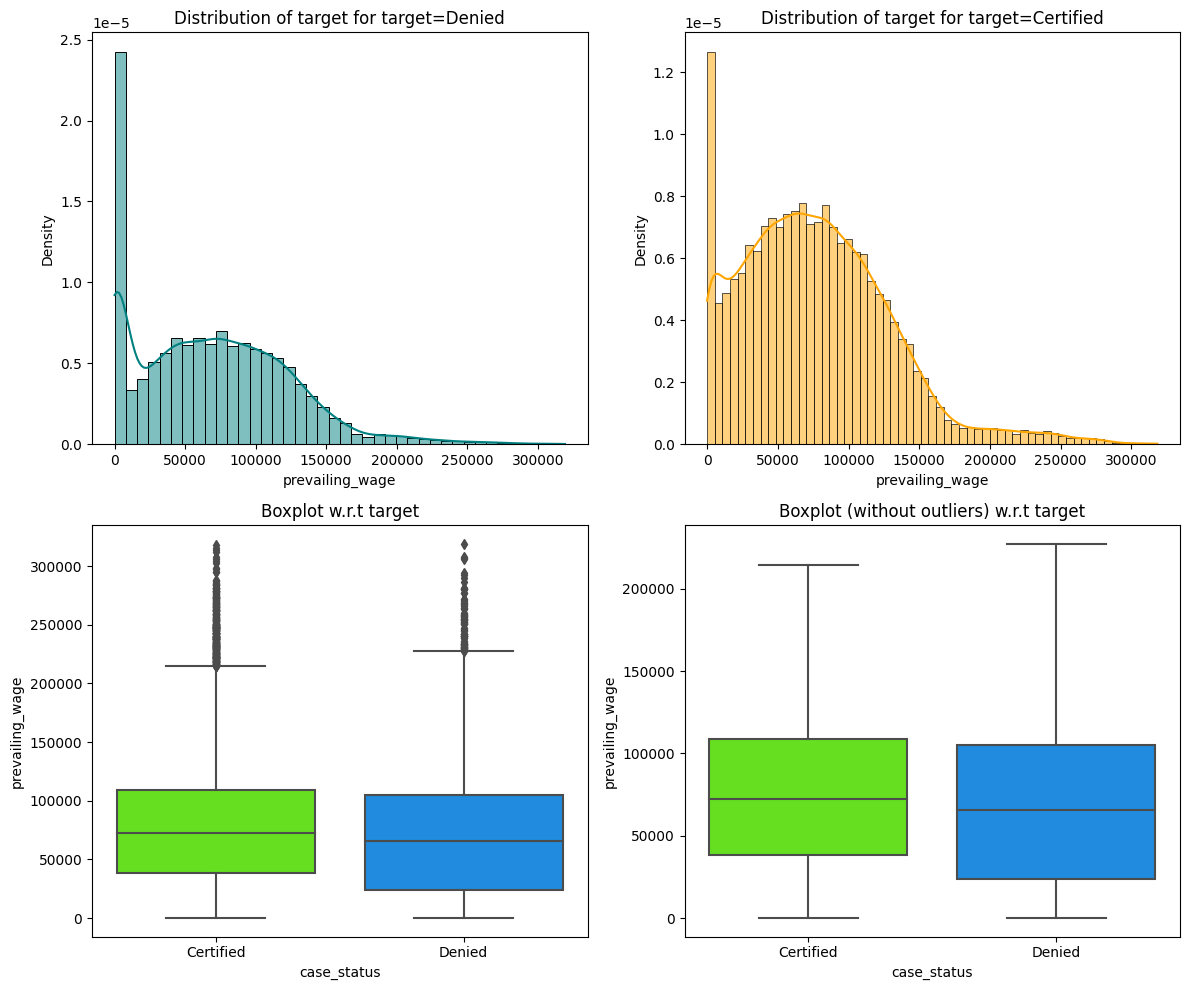

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

- There's a tiny bit more chance of getting certified for those with higher wages.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


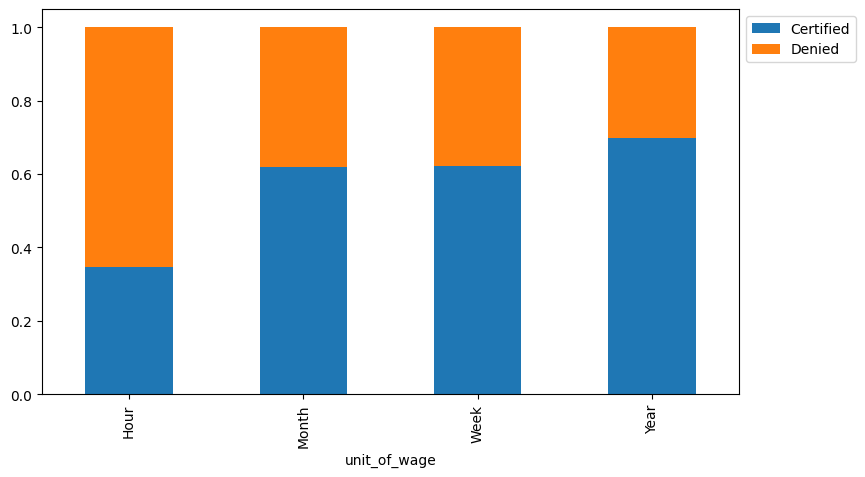

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

- Yearly wages have a higher chance of certification, while hourly ones have only around 35% chance.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


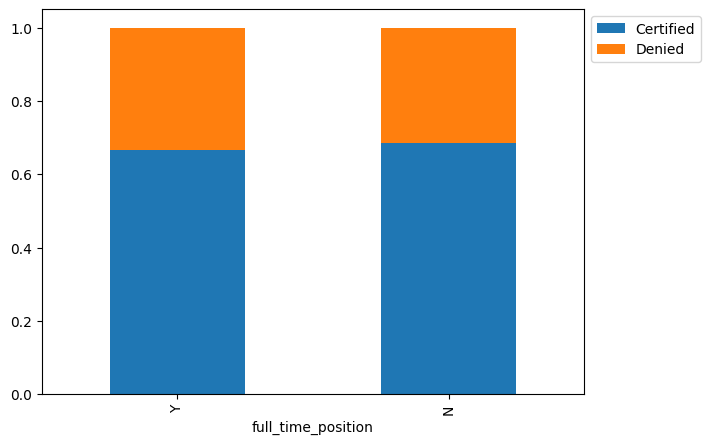

In [ ]:
stacked_barplot(data, "full_time_position", "case_status")

- Time position doesn't have an impact on certification outcome.

## Data Preprocessing

### Duplicate Value Check

In [ ]:
data.duplicated().sum()

0

- There are no duplicated values in the dataset.

### Outlier Detection and Treatment

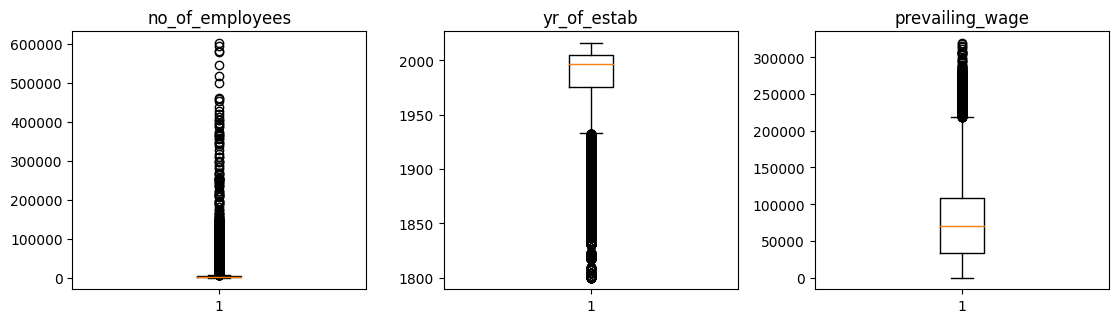

In [ ]:
# outlier detection w/boxplot
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There's a lot of outliers in the data which do not need to be treated because they're real values.

### Data Preparataion for model building

In [ ]:
# changing values of case status to numerical 
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
# Separating features from target column
X = data.drop('case_status', axis=1)
y = data['case_status']

# Adding dummie variables to features
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((17836, 21), (7644, 21))

In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1   0.66792
0   0.33208
Name: case_status, dtype: float64
Percentage of classes in test set:
1   0.66784
0   0.33216
Name: case_status, dtype: float64


- There are 17,836 rows for the train set and 7,644 for test set.
- 66.8% of applications were approved.

###Model Criteria
####Model can make wrong predictions as:

- Predicting a VISA application as certified when in reality was denied.
- Predicting a VISA application as rejected when in reality was certified.

####Which case is more important?

Both the cases are important as:

-  If a VISA is certified when it shouldn't, a more fit U.S. candidate will lose the opportunity for the job position.
- If a VISA is denied when it shouldn't, an excellent candidate will lose the opportunity to get the position, and thecompany will lose that valuable asset.

####How to reduce this loss?

We will need to reduce both False Negatives and False Positives by focusing on the f1_score. The greater the f1_score, the higher the chances of reducing both False Negatives and False Positives.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using
def model_performance_classification_statsmodels(
    model, predictors, target
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors) 


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0], )
    
    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##Decision Tree - Model Building and Hyperparameter Tuning

Training performance:
    Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.66484 0.74280    0.75223 0.74749


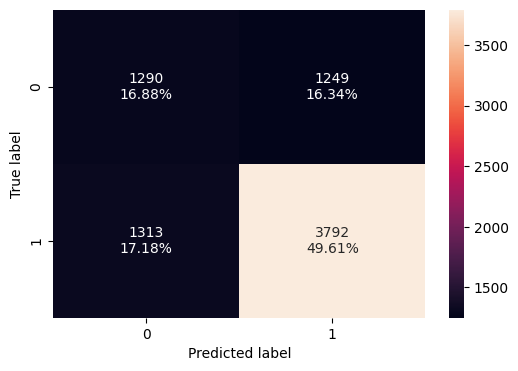

In [ ]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating metrics
d_tree_model_train_perf=model_performance_classification_statsmodels(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_statsmodels(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_statsmodels(d_tree,X_test,y_test)

- The model is over-fitting the data.

###Hyperparameter Tuning

In [ ]:
# Type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight='balanced',random_state=1)

# Grid of parameters
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used
scorer = metrics.make_scorer(metrics.f1_score)

# Grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, random_state=1)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.71255 0.93192    0.72007 0.81241
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.70657 0.93085    0.71545 0.80906


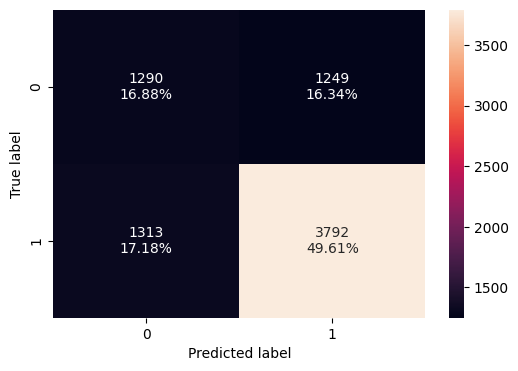

In [ ]:
#Calculating metrics
dtree_estimator_model_train_perf=model_performance_classification_statsmodels(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_statsmodels(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_statsmodels(d_tree,X_test,y_test)

- Model isn't over-fitting the data anymore.
- F1-scores have increased, and the model seems to be doing better.

## Bagging Classifier - Model Building and Hyperparameter Tuning

Training performance:
    Accuracy  Recall  Precision      F1
0   0.98520 0.98598    0.99181 0.98889
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.69152 0.76415    0.77171 0.76791


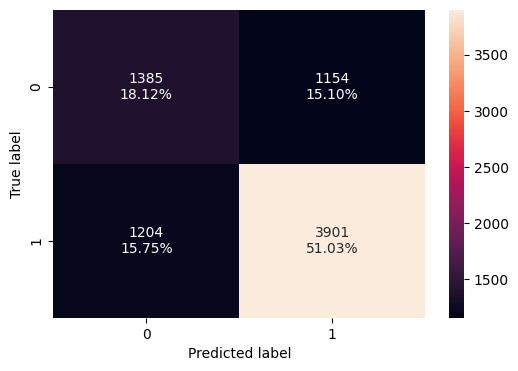

In [ ]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

# Calculatin metrics
bagging_classifier_model_train_perf=model_performance_classification_statsmodels(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_statsmodels(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_statsmodels(bagging_classifier,X_test,y_test)

- The model is over-fitting the data

###Hyperparameter Tuning

In [ ]:
# Type of classifier
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used 
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.99282 0.99882    0.99051 0.99465
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.73051 0.86993    0.76084 0.81173


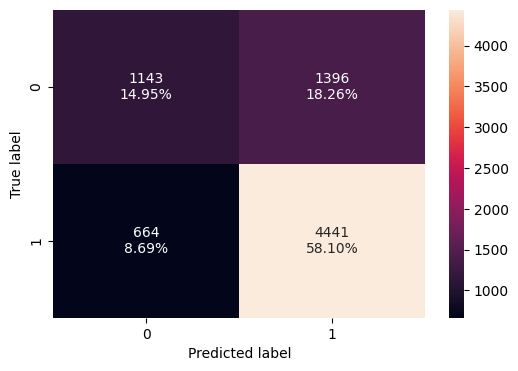

In [ ]:
# Calculatin metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_statsmodels(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_statsmodels(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_statsmodels(bagging_estimator_tuned,X_test,y_test)

- Model is still over-fitting the data but metrics improved by a little.

## Random Forest - Model Building and Hyperparameter Tuning

Training performance:
    Accuracy  Recall  Precision      F1
0   0.99994 0.99992    1.00000 0.99996
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.72083 0.83213    0.76887 0.79925


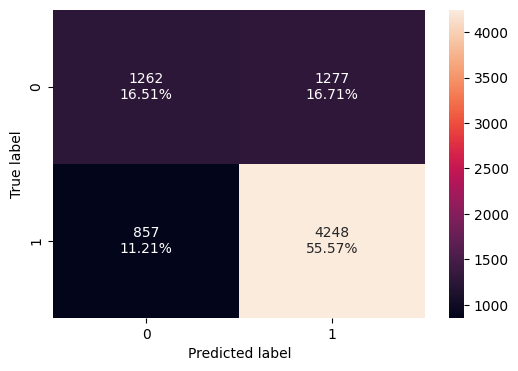

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

# Calculating metrics
rf_estimator_model_train_perf=model_performance_classification_statsmodels(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_statsmodels(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_statsmodels(rf_estimator,X_test,y_test)

- The model is over-fitting the data

###Hyperparameter Tuning

In [ ]:
# Type of classifier
rf_tuned = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,15,5)),
                'max_features': ['sqrt','log2'],
                'min_samples_split': np.arange(2, 10, 5),
                'n_estimators': np.arange(10,25,5)}

# Type of scoring used
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.76912 0.91866    0.77656 0.84165
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.73810 0.89892    0.75539 0.82093


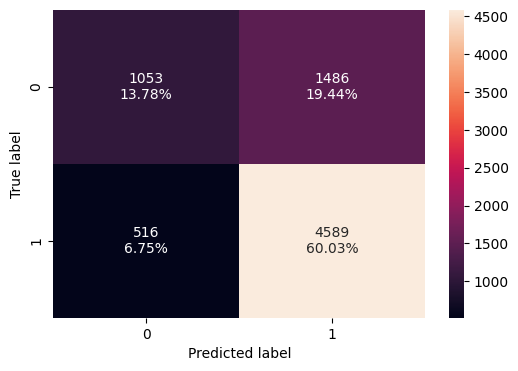

In [ ]:
# Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_statsmodels(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_statsmodels(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_statsmodels(rf_tuned,X_test,y_test)

- The model isn't over-fitting anymore and it's doing a little better.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

   Accuracy  Recall  Precision      F1
0   0.73823 0.88718    0.76069 0.81908
   Accuracy  Recall  Precision      F1
0   0.73430 0.88501    0.75780 0.81648


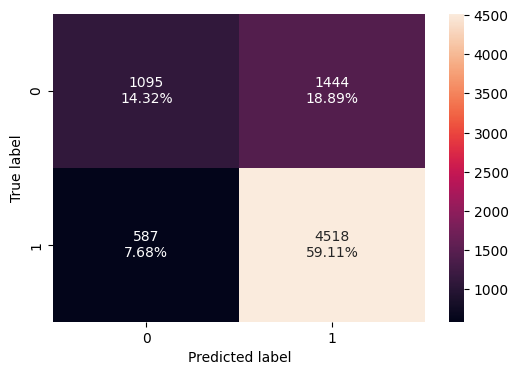

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

# Calculating metrics
ab_classifier_model_train_perf=model_performance_classification_statsmodels(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_statsmodels(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_statsmodels(ab_classifier,X_test,y_test)

- Model fits well and isn't doing too bad

### Hyperparameter Tuning

In [ ]:
# Choose the classifier
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, random_state=1)

   Accuracy  Recall  Precision      F1
0   0.75432 0.88936    0.77568 0.82864
   Accuracy  Recall  Precision      F1
0   0.74045 0.88129    0.76553 0.81934


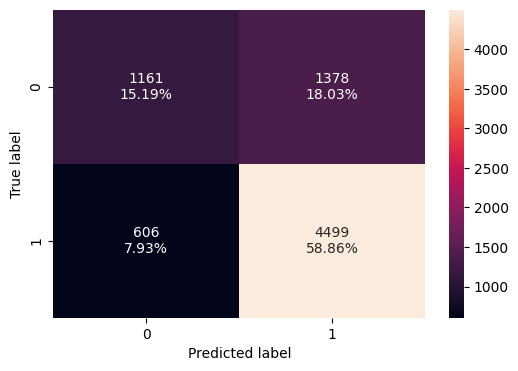

In [ ]:
# Calculating metrics
abc_tuned_model_train_perf=model_performance_classification_statsmodels(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_statsmodels(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_statsmodels(abc_tuned,X_test,y_test)

- Model is doing fairly good without over-fitting

### Gradient Boosting Classifier

Training performance:
    Accuracy  Recall  Precision      F1
0   0.75880 0.88374    0.78304 0.83035
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74477 0.87600    0.77237 0.82093


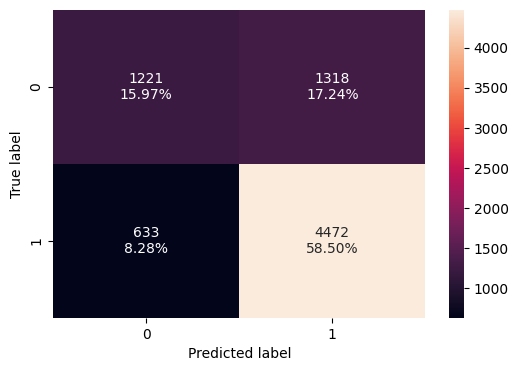

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

# Calculating metrics
gb_classifier_model_train_perf=model_performance_classification_statsmodels(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_statsmodels(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_statsmodels(gb_classifier,X_test,y_test)

- The model is doing a little better than AdaBoost and isn't over-fitting

### Hyperparameter Tuning

In [ ]:
# Type of classifier 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [150,200,250],
    "subsample":[0.9,1],
    "max_features":[0.8,0.9,1],
    "learning_rate": np.arange(0.1, 0.5, 0.1),
}

# Type of scoring
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.76402 0.88265    0.78906 0.83323
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74346 0.87130    0.77330 0.81938


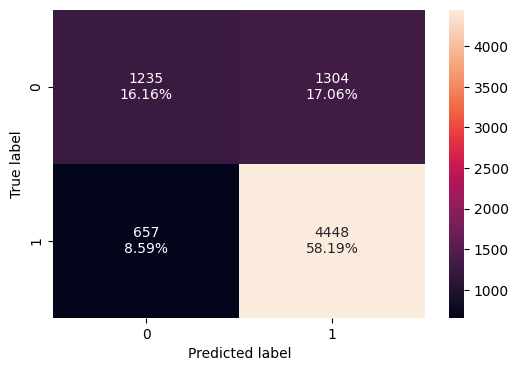

In [ ]:
# Calculating metrics
gbc_tuned_model_train_perf=model_performance_classification_statsmodels(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_statsmodels(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_statsmodels(gbc_tuned,X_test,y_test)

- Model hasn't improved

### XGBoost Classifier

Training performance:
    Accuracy  Recall  Precision      F1
0   0.83875 0.93142    0.84348 0.88527
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.73325 0.86072    0.76791 0.81167


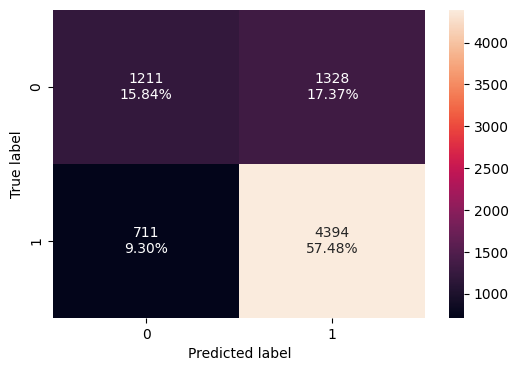

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

# Calculating metrics
xgb_classifier_model_train_perf=model_performance_classification_statsmodels(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_statsmodels(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_statsmodels(xgb_classifier,X_test,y_test)

- Model isn't doing any better than GB and it's over-fitting a little, but is giving overall high metrics.

### Hyperparameter Tuning

In [ ]:
# Type of classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "gamma": [3, 5],
    "colsample_bytree":[0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Training performance:
    Accuracy  Recall  Precision      F1
0   0.75807 0.88273    0.78279 0.82976
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74686 0.87581    0.77460 0.82210


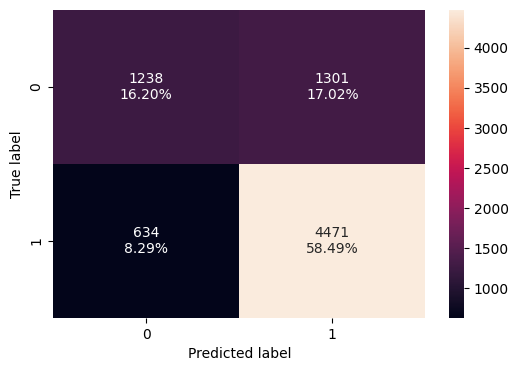

In [ ]:
# Calculating metrics
xgb_tuned_model_train_perf=model_performance_classification_statsmodels(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_statsmodels(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_statsmodels(xgb_tuned,X_test,y_test)

- Model isn't over-fitting anymore and metrics improved a little.

## Stacking Model

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gb_classifier), ('AdaBoost',abc_tuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=0.1,
                                                   random_state=1))],
                   final_estimator=X...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Training performance:
    Accuracy  Recall  Precision      F1
0   0.76020 0.88349    0.78463 0.83113
Testing performance:
    Accuracy  Recall  Precision      F1
0   0.74163 0.87365    0.77029 0.81872


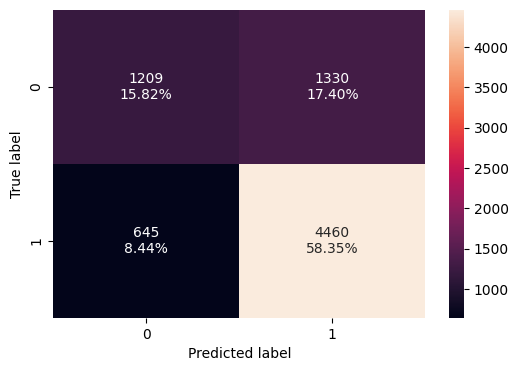

In [ ]:
# Calculating metrics
stacking_classifier_model_train_perf=model_performance_classification_statsmodels(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_statsmodels(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_statsmodels(stacking_classifier,X_test,y_test)

- The stacking classifier is giving similar metrics compared to the Gradiend Booster tuned model, though the GB tuned is still doing a little bit better job in both sets.

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.00000,0.71255,0.99994,0.76912,0.98520,0.99282,0.73823,0.75432,0.75880,0.76402,0.83875,0.75807,0.76020
Recall,1.00000,0.93192,0.99992,0.91866,0.98598,0.99882,0.88718,0.88936,0.88374,0.88265,0.93142,0.88273,0.88349
Precision,1.00000,0.72007,1.00000,0.77656,0.99181,0.99051,0.76069,0.77568,0.78304,0.78906,0.84348,0.78279,0.78463
F1,1.00000,0.81241,0.99996,0.84165,0.98889,0.99465,0.81908,0.82864,0.83035,0.83323,0.88527,0.82976,0.83113


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.66484,0.70657,0.72083,0.73810,0.69152,0.73051,0.73430,0.74045,0.74477,0.74346,0.73325,0.74686,0.74163
Recall,0.74280,0.93085,0.83213,0.89892,0.76415,0.86993,0.88501,0.88129,0.87600,0.87130,0.86072,0.87581,0.87365
Precision,0.75223,0.71545,0.76887,0.75539,0.77171,0.76084,0.75780,0.76553,0.77237,0.77330,0.76791,0.77460,0.77029
F1,0.74749,0.80906,0.79925,0.82093,0.76791,0.81173,0.81648,0.81934,0.82093,0.81938,0.81167,0.82210,0.81872


- Most models are doing good and have very similar metrics.
- DecisionTree, RandomForest, BaggingClassifier, BaggingClassiferTuned, are all over-fitting the data.
- Top best models are:
  1. GradientBoostClassifier
  2. XGBoostTuned
  3. Stacking, with F1-scores in testing data ranging 0.81-0.82.

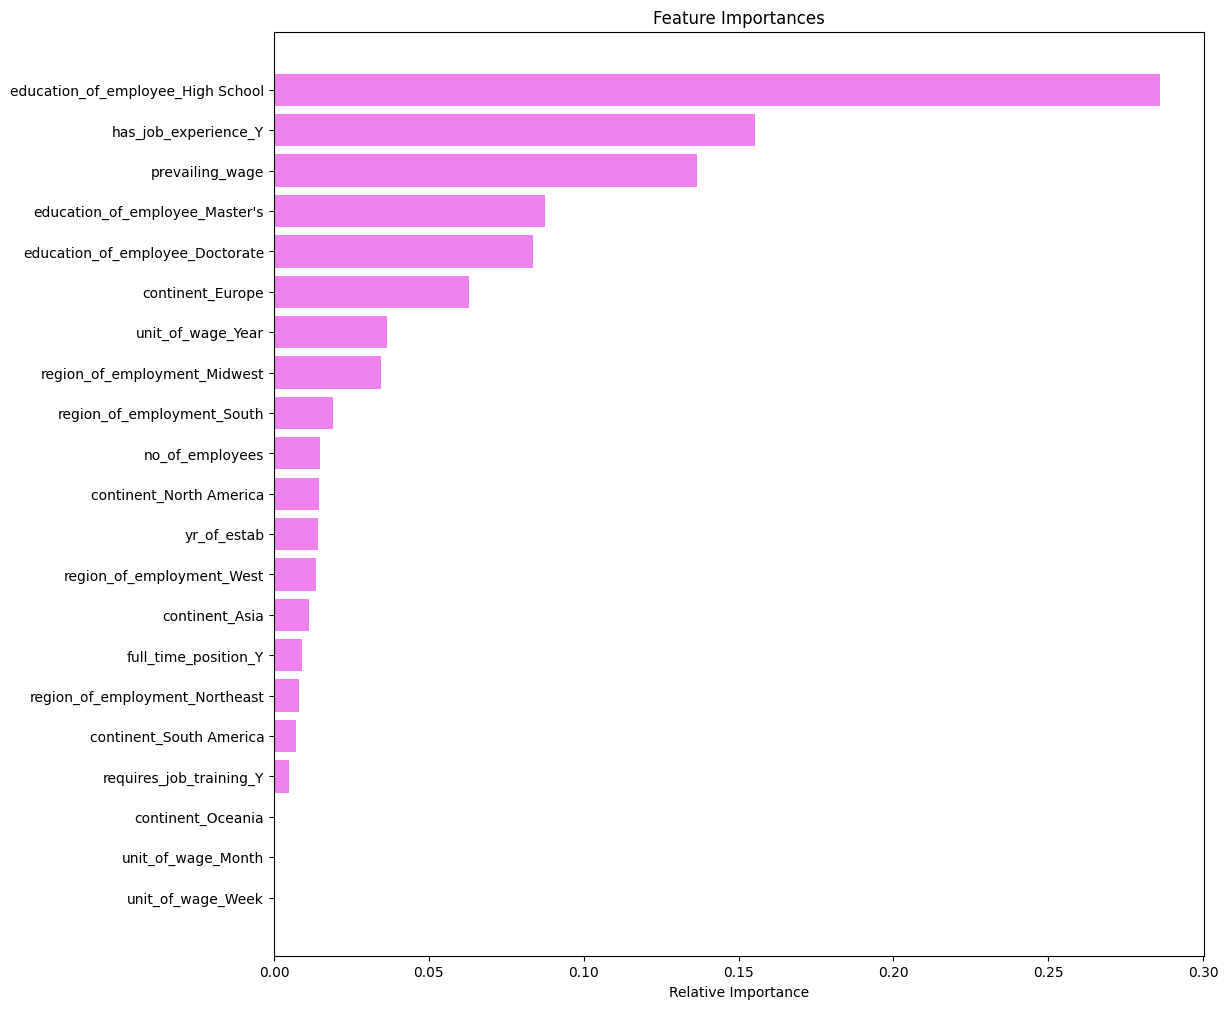

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Top most important factors for VISA approval are:
    1. Education of employee
    2. Job experiencce
    3. Prevailing wage

## Observations and Business Recommendations

- 66% of employees come from Asia.
- 40% of employees have up to a Bachelor's Degree (most recurring degree)
- 58% of employees have job experience
- Most  employees don't require training (88%)
- There are outliers for the number of employees in employer's companies due to a significant difference between the 4th quartile and max value. There are also negative values that need to be taken care of.
- There are companies established from 1800 all the way to 2016.
- 28% of employees are being employed in the Northeast region (most recurring value)
- The average prevailing wage is 74,455, with 75% of employees being offered less than 107,735.
- Most  employees are offered a full-time position (89%)
- 66% of foreign workers are given a Visa.



- The Gradient Booster Classifier Model is able to predict up to 87% of approved VISA applications and 48% of denied applications. Its accuracy is around 75% and its precision is over 77%. Overall the model is better at predicting valuable employees than rejecting non-valuable ones.
- Most important factors that should be taken into account when reviewing an application should be:
  1. Education level
  2. Job Experience
  3. Prevailing wage
- Applications for employees with only High School Diplomas should be reviewed more thoroughly, as they tend to be denied more often, and the model might predict them wrongly.




In [1]:
%%shell
jupyter nbconvert --to html /content/EasyVisa_Full_Code.ipynb

[NbConvertApp] Converting notebook /content/EasyVisa_Full_Code.ipynb to html
[NbConvertApp] Writing 2216221 bytes to /content/EasyVisa_Full_Code.html
